[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



(a) An example of a categorical varible is hair color.
<br>
(b) An example of a quantitative vairble is height
<br>
(c) An example of a discreate varible is maritial status.
<br>
(d) An example of a continuous varible is temperature

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

(array([ 1., 10., 11.,  4.,  4.,  2.,  0.,  0.,  0.,  3.]),
 array([ 2.  ,  3.45,  4.9 ,  6.35,  7.8 ,  9.25, 10.7 , 12.15, 13.6 ,
        15.05, 16.5 ]),
 <BarContainer object of 10 artists>)

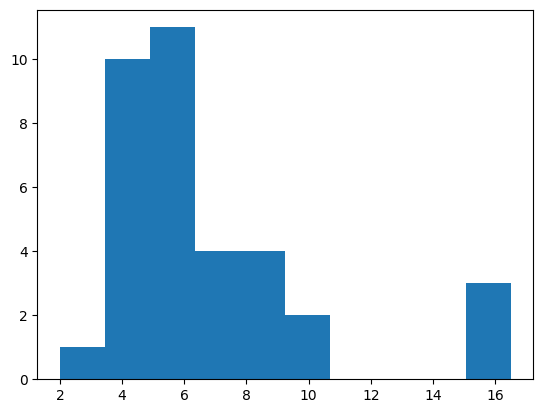

In [2]:
plt.hist(carbon_west['CO2'])

Part b. Find the mean, median, and standard deviation.

In [3]:
mean_value = np.mean(carbon_west['CO2'])
med_value = np.median(carbon_west['CO2'])
std_deviation = np.std(carbon_west['CO2'])

print(f"Mean: {mean_value}")
print(f"Median: {med_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [4]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [18]:
no_dc = murders[murders["state"] != "DC"]

ndc_mean = np.mean(no_dc['murder'])
ndc_med = np.median(no_dc['murder'])
ndc_std = np.std(no_dc['murder'])


print(f"Mean: {ndc_mean}")
print(f"Median: {ndc_med}")
print(f"Standard Deviation: {ndc_std}")

Mean: 4.874
Median: 4.85
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [6]:
no_dc['murder'].describe()

,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

It seems like to me the mean was effected more compared to the median, and it looks like the range was effected by a large margin.

In [7]:
murders['murder'].describe()

,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [8]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

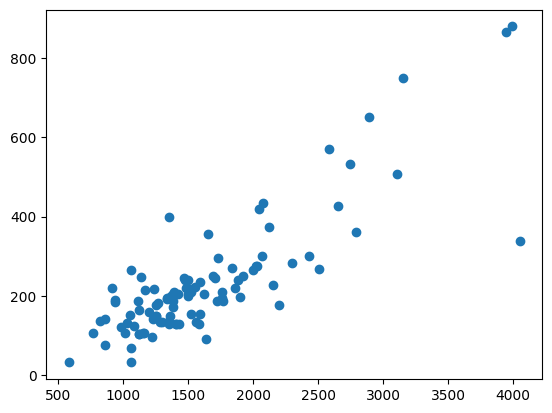

In [9]:
plt.scatter(houses['size'], houses['price'])

Part b. Find the correlation between the two variables.

In [10]:
correlation = houses['size'].corr(houses['price'])

print(f'Correleation: {correlation}')


Correleation: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

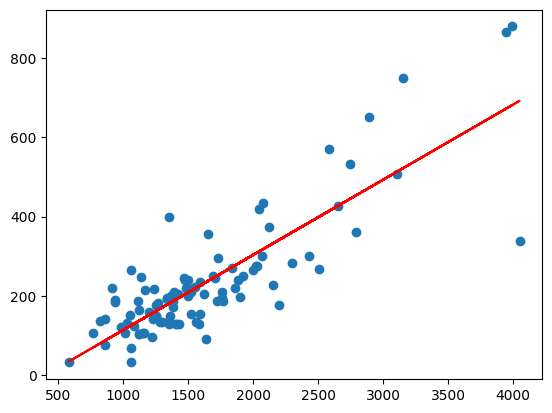

In [11]:
x = houses[['size']]
y = houses[['price']]

model = LinearRegression()
model.fit(x,y)
slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(x, y, label='ScatterPlot')
plt.plot(x, model.predict(x), color='red')


Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

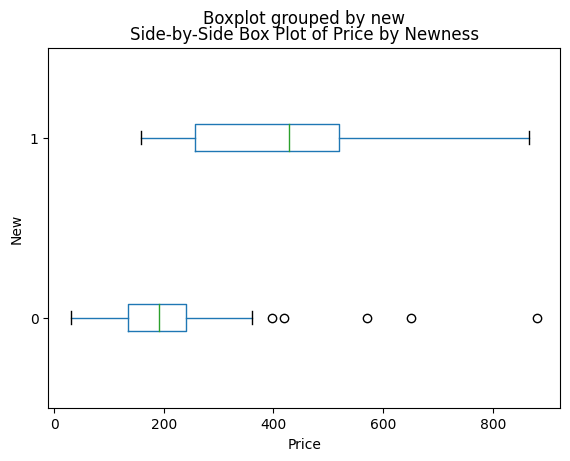

In [12]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of Price by Newness')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

It seems in the graph for size, and price we can see that there is a positive correlation relationship, meaning that as the size goes up. We can tell that in the plot because it goes up in a linear positive line for the most part. The regression line clearly shows that relationship.

We can also see that in the price vs a house is newness that a newer house cost more. Obviously there are some outliers within the old houses, but we can see the median for the new houses has about a 300 difference. We can also see that the lowest value in the new house is almost at the median of the old hosues.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [13]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [14]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0


In [15]:
pd.crosstab(happy['marital'], happy['happiness'], normalize='index')

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,0.304462,0.000000,0.000000,0.00000,0.56168,0.000000,0.000000,0.000000,0.133858,0.000000,0.000000,0.000000
fem,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mal,0.000000,0.119553,0.036872,0.06257,0.00000,0.255866,0.127374,0.234637,0.000000,0.036872,0.050279,0.075978
male,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
